# ADVANCED ANALISYS (ANÁLISIS AVANZADOS)

El objetivo de esta sección es realizar análisis de alto nivel, aplicando técnicas de EDA avanzadas, cómo PCA o Clusterización.

<br>

Se encarga de responder preguntas como:
- ¿Existen grupos de vinos definidos por ciertas variables?
- ¿Existe una buena combinación de variables que sea capaza de describir a los mejores vinos?
- ¿Qué variables son las más importantes para describir a un vino?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [1]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [2]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
wines.head(3)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,0.1410,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.000,0.000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1400,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1416,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Maricel, esto es lo que te decía de la selección de variables para después aplicar en el modelo
# Está bueno para leer (fijate si lo podés traducir)
# Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

## 01 | Clusters

### Perfil de Sabor

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Notas

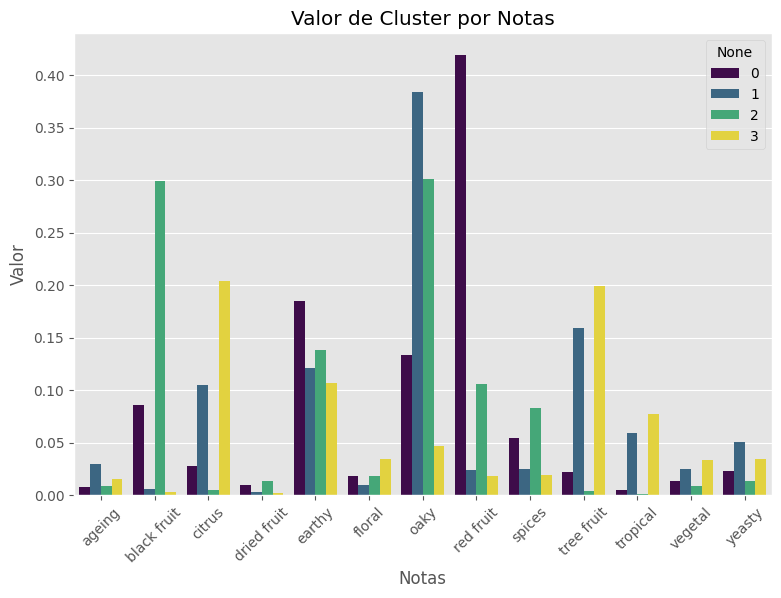

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
from sklearn.cluster import KMeans

notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"]
notes = wines[notes].copy()
notes_array = np.array(notes)
kmeans_notes = KMeans(n_clusters=4, random_state=0, n_init="auto", max_iter=300).fit(notes_array)
notes["note_cluster"] = kmeans_notes.labels_
cluster_centers_df = pd.DataFrame(kmeans_notes.cluster_centers_, columns=notes.columns[:-1])
cluster_centers_df = pd.melt(cluster_centers_df, var_name="notes", value_name="value", ignore_index=False)
#cluster_centers_df = cluster_centers_df.reset_index(drop=False)

plt.title("Valor de Cluster por Notas")
sns.barplot(data=cluster_centers_df, x="notes", y="value", hue=cluster_centers_df.index, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Notas")
plt.ylabel("Valor")
plt.show()


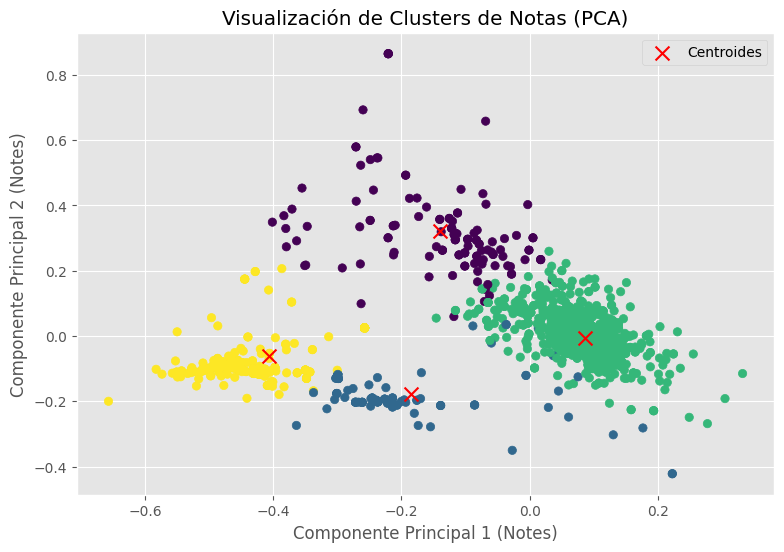

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
notes_pca = pca.fit_transform(notes_array)
centers = pca.transform(kmeans_notes.cluster_centers_)

#fig = plt.figure(figsize=(12,9))
#ax = fig.add_subplot(111, projection="3d")

plt.title("Visualización de Clusters de Notas (PCA)")
#ax.scatter(xs=notes_pca[:, 1], ys=notes_pca[:, 0], zs=notes_pca[:, 2], c=kmeans_notes.labels_)
plt.scatter(x=notes_pca[:,0], y=notes_pca[:,1], c=kmeans_notes.labels_)
plt.scatter(centers[:,0], centers[:,1], c="red", s=100, marker="x", label="Centroides")
plt.legend()
plt.xlabel("Componente Principal 1 (Notes)")
plt.ylabel("Componente Principal 2 (Notes)")
plt.show()

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Maridajes

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

---

## 02 | Clusters + Reducción de Dimensionalidad (PCA)

### Perfil de Sabor

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Notas

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Maridaje

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

---

## 03 | Cruce entre Clusters

- Objetivo: ver si existen relaciones entre ciertos clusters y otros que describan los mejores y peores vinos.

### Sin Reducción de Dimensionalidad (PCA)

**Cluster Perfil de Sabor vs Cluster Notas**

**Cluster Perfil de Sabor vs Cluster Maridaje**

**Cluster Notas vs Cluster Maridaje**

### Con Reducción de Dimensionalidad (PCA)

**Cluster Perfil de Sabor vs Cluster Notas**

**Cluster Perfil de Sabor vs Cluster Maridaje**

**Cluster Notas vs Cluster Maridaje**

---